Student name:AKHIL RAGHU NATH

Student id:23048417

# Task: Deep neural networks

#### Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Get the data an manipulate

We're going to use the Fashion MNIST dataset, which we can download from OpenML.

Fashion-MNIST is a dataset of Zalando's article images—consisting of a set of 60,000 samples. Each sample is a 28x28 grayscale image, associated with a label from 10 classes.

Label IDs:
* T-shirt/top - 0
* Trouser - 1
* Pullover - 2
* Dress - 3
* Coat - 4
* Sandal - 5
* Shirt - 6
* Sneaker - 7
* Bag - 8
* Ankle boot - 9

We'll load up the Fashion-MNIST dataset. It will take a few seconds.


In [2]:
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.utils import check_random_state

# Load data from https://www.openml.org/d/554
X, y = fetch_openml("Fashion-MNIST", version=1, return_X_y=True, as_frame=False)

text_labels = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


Let's also visualise a few random samples of this

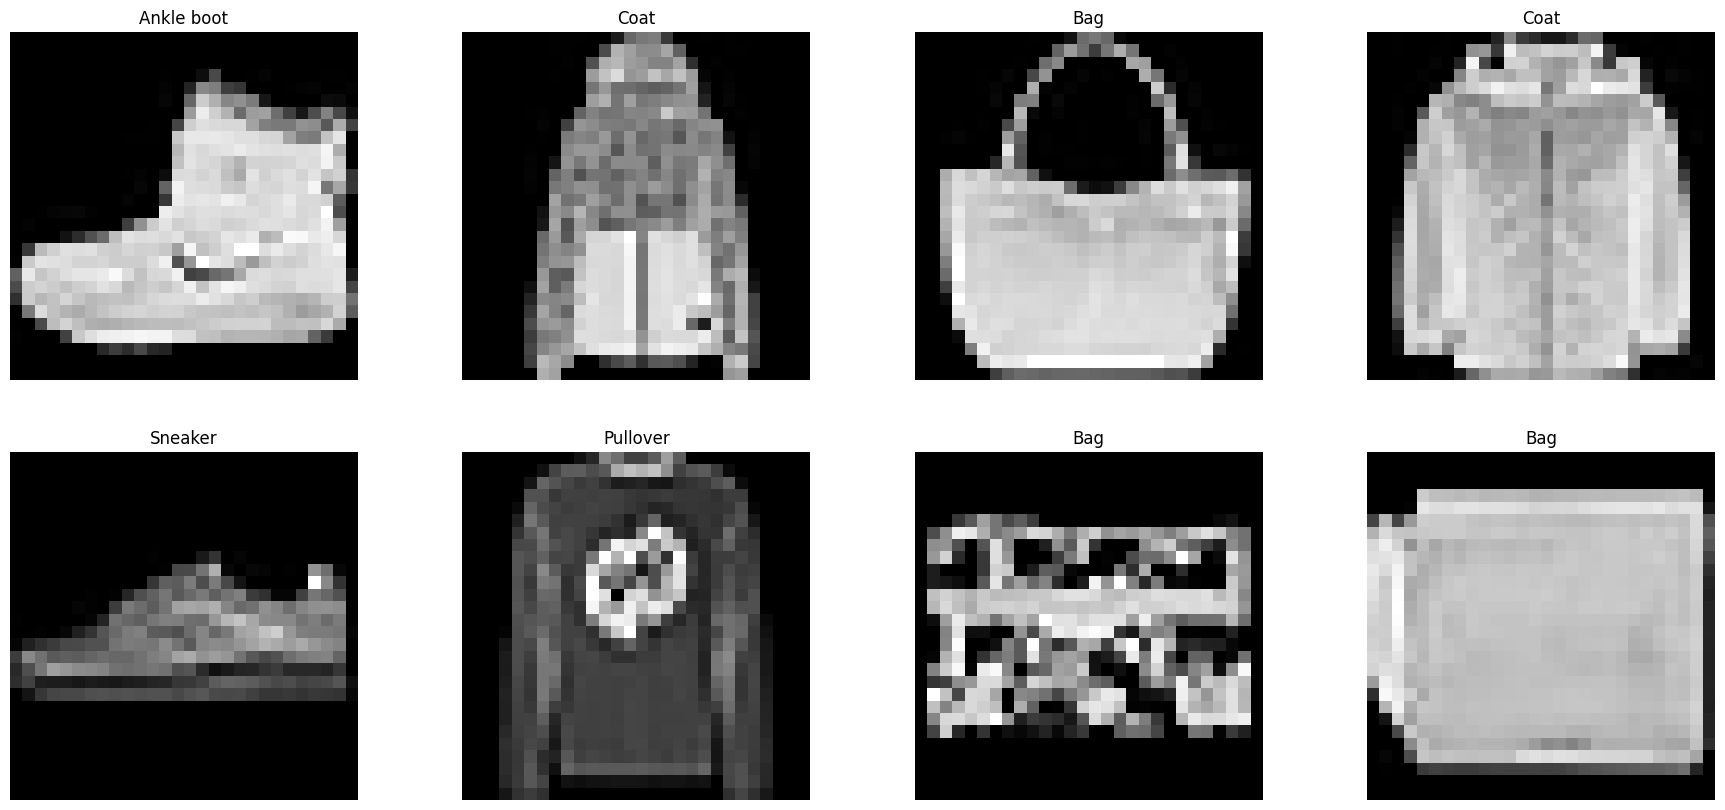

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# You can put between 0 to 59999 here
index = (0, 22, 100, 555, 666, 123, 10000, 55005)

# Set number of characters per row when printing
np.set_printoptions(linewidth=320)

# Visualize the image

fig, ax = plt.subplots(2, 4, figsize=(22, 10))
fig.subplots_adjust(wspace=0.3)
ax = ax.flatten()

for i in range(len(index)):
    ax[i].imshow(np.reshape(X[index[i]], (-1, 28)), cmap='gray', vmin=0, vmax=255)
    ax[i].axis('off')  # clear x-axis and y-axis
    ax[i].set_title(text_labels[int(y[index[i]])])

plt.show()

### Data manipulation

Firstly, do a train/test split. Keep 20% of the data for test. Fix the `random_state` so that the test is completely repeatible.

Then use the `StandardScaler` function from `sklearn.preprocessing`, as the multi-layer perceptron can be quite sensitive to data scaling.

<span style="color:red">Insert your code below</span>.

In [14]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
# Using  the scikit-learn train_test_split function to split into test and training data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# create a StandardScaler instance
scaler=StandardScaler()
# Applying scaling to training data
X_train_scaled = scaler.fit_transform(X_train)
# Applying scaling to test data
X_test_scaled = scaler.transform(X_test)

## Task 1: Train a Perceptron

1. A single artifical neuron is a Perceptron, so use `sklearn`'s implementation of the Percpetron, and train it.
2. Calculate and print the accuracy
3. Discuss the result, does it seem good or bad?
4. Find an example where the classification is incorrect, and plot it. Discuss (e.g. does it kind of look like the clothing item that was predicted?)
5. Multiclass perceptron? We learned that the Percpetron is a binary classifier. Give a brief description of how multi-class perceptron might work. Of course, use the internet, but give it to me in your own words, and use a diagram as appropriate.

<span style="color:red">Insert your code below</span>.

In [15]:
from sklearn.linear_model import Perceptron as Perceptron
#training the algorithm
ppn=Perceptron()
ppn.fit(X_train_scaled,y_train)
y_predict=ppn.predict(X_test_scaled)
y_pred=ppn.predict(X_train_scaled)

Calculating Accuracy score

In [16]:
from sklearn.metrics import accuracy_score
#calculating Accuracy Score
print("Train Accuracy :",accuracy_score(y_train,y_pred))
print("Test Accuracy :",accuracy_score(y_test,y_predict))

Train Accuracy : 0.8257142857142857
Test Accuracy : 0.8115714285714286


Plotting one incorrect classification

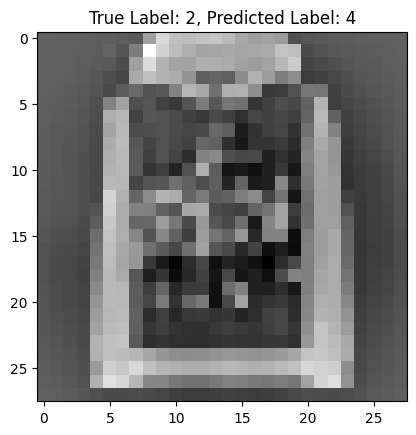

In [13]:
import matplotlib.pyplot as plt

# An example where the classification is incorrect
incorrect_index = [i for i in range(len(y_test)) if y_test[i] != y_predict[i]][0]

# Ploting the incorrect example
plt.imshow(X_test_scaled[incorrect_index, :].reshape(28, 28), cmap='gray')
plt.title(f"True Label: {y_test[incorrect_index]}, Predicted Label: {y_predict[incorrect_index]}")
plt.show()


Plotting some more incorrect examples

[0, 5, 7, 11, 12, 13, 23, 26]


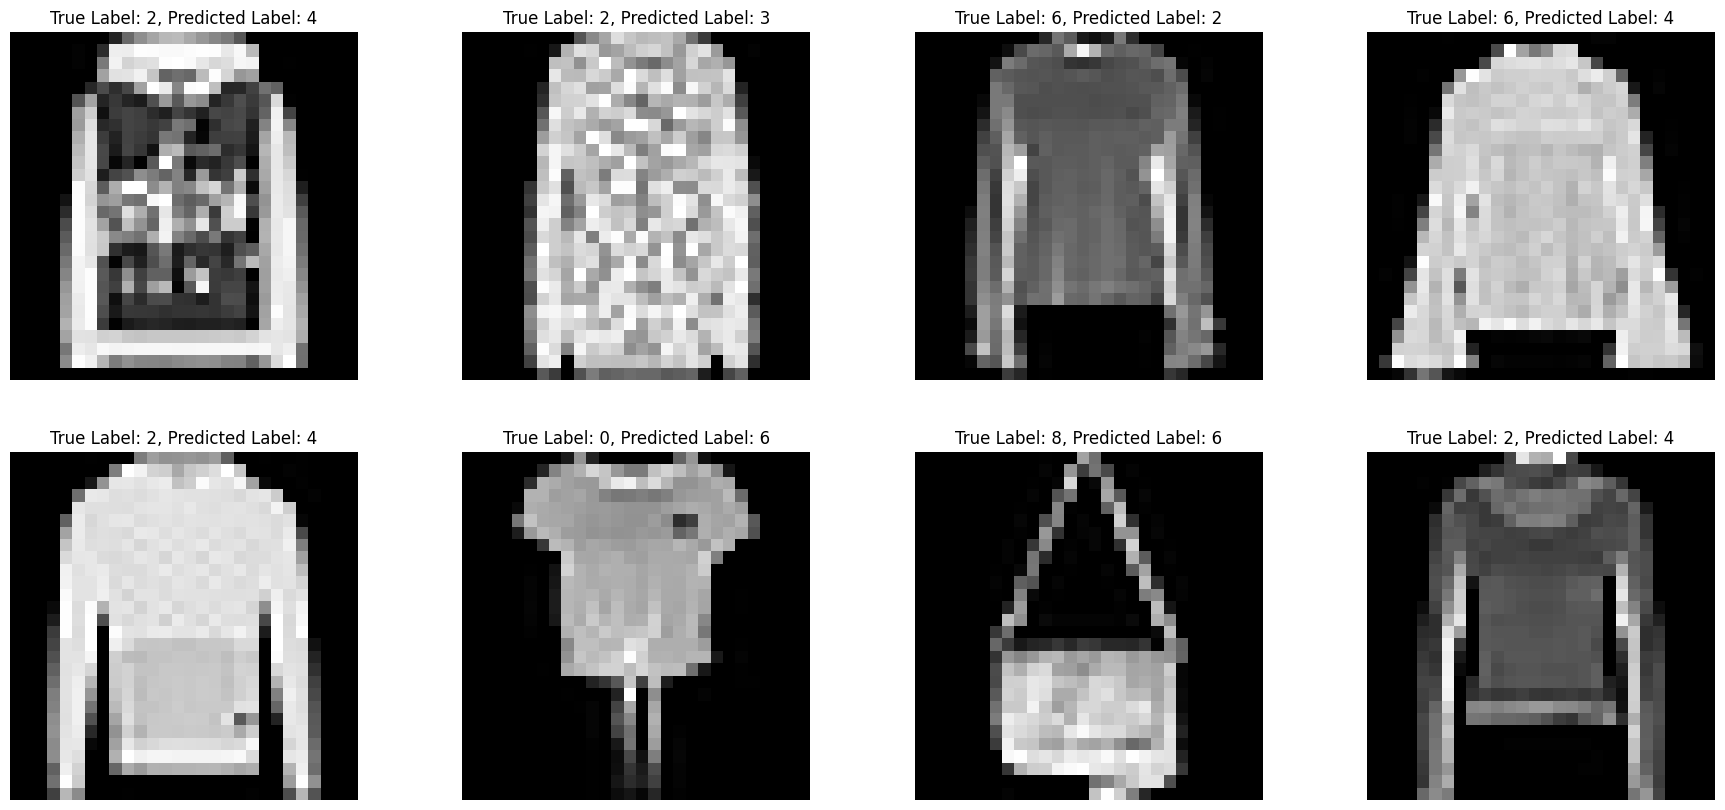

In [11]:
incorrect_index = [i for i in range(len(y_test)) if y_test[i] != y_predict[i]][:8]

print(incorrect_index)
np.set_printoptions(linewidth=320)

# Visualize the image

fig, ax = plt.subplots(2, 4, figsize=(22, 10))
fig.subplots_adjust(wspace=0.3)
ax = ax.flatten()
for j in range(8):
    i = incorrect_index[j]
    ax[j].imshow(np.reshape(X_test[i], (-1, 28)), cmap='gray', vmin=0, vmax=255)
    ax[j].axis('off')
    ax[j].set_title(f"True Label: {y_test[i]}, Predicted Label: {y_predict[i]}")

<font color='red'>Enter your text here</font>

Discuss the result, does it seem good or bad?

The accuracy is not too bad for a simple linear classifier. However, attaining 82.5% accuracy on the training data doesn't stand out when compared to other algorithms. Considering it as one of the oldest algorithms, it's reasonable to conclude that the accuracy achieved is fairly decent, yet there's significant room for enhancement . We can improve it by exploring a multilayer perceptron, as demonstrated in the subsequent task.

4. Find an example where the classification is incorrect, and plot it. Discuss (e.g. does it kind of look like the clothing item that was predicted?)


In the above codes , misclassified instances are plotted for analysis.In first plot, the pullover(2) was wrongly predicted as coat(4).However, this single plot lacks conclusive evidence. Therefore, I generated an additional set of eight misclassified plots for further insights.From these we can infer that pullover was predicted wrong as coat or dress in four out of eight instance.Probability of missclassifying pullover is very high ,around half.Additionally Shirt is also wrongly predicted as either pullover or coat in two out of eight instance.


5. Multiclass perceptron? We learned that the Percpetron is a binary classifier. Give a brief description of how multi-class perceptron might work. Of course, use the internet, but give it to me in your own words, and use a diagram as appropriate.

We already seen that the perceptron algorithm, inspired by the biological neuron model, operates based on its activation. In a binary classifier, the artificial neuron receives the feature vector as a stimulus. It undergoes a dot product operation with a weight vector to compute the activation value specific to the data point. When the activation energy surpasses a certain threshold, the neuron 'fires,' indicating that the data satisfies the classification criteria.

In the context of a multi-class perceptron, the feature vector undergoes multiplication by multiple weight vectors (each specific to a unique class )using the dot product operation. The class assignment for the data is determined by the weight vector that produces the highest activation energy among all, indicating the predicted class. This decision process is known as the Multi-Class Decision Rule









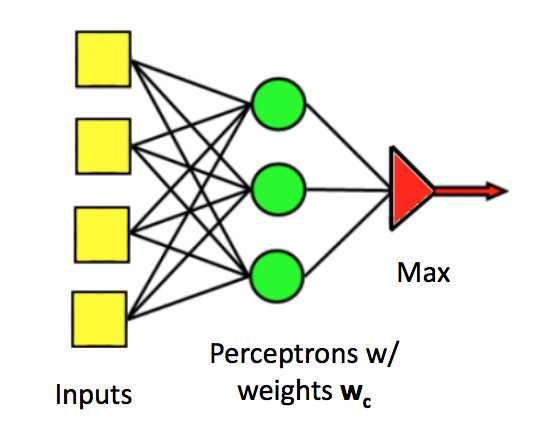



[image source :https://courses.grainger.illinois.edu/cs440/fa2019/Lectures/lect26.html ][(from Mark Hasegawa-Johnson, CS 440, Spring 2018)]


The multi-class perceptron employs either the one-vs-rest (OvR) or one-vs-one (OvO) strategy for handling multiple classes. In OvR, for a dataset let it be  K classes, the strategy trains K separate Perceptron classifiers, with each classifier dedicated to a specific class. During prediction, all K classifiers make predictions, and the class producing the highest confidence or maximum output value ( the highest dot product) will be the final prediction.
On the other hand, in OvO, for instance, with three classes (A, B, and C), the strategy trains three binary classifiers: one for (A vs B), another for (A vs C), and the third for (B vs C). During prediction, each pair-wise classifier calculates predictions based on the input data by computing the dot product between the input feature vector and its respective weight vectors for that pair of classes. The class receiving the most predictions across all binary classifiers is determined as the final prediction


## Task 2: Train a multi-layer Perceptron with one hidden layer (of width 20)

Let's try going wide first

* Set the regularizing parameter to 0.1 (alpha = 0.1). We have looked at regularisation before in the context of machine learning algorithms. It is important, but we won't investigate it further here. We'll leave this fixed.
* Set verbose = 1, so we can look at what is happenign on each epoch (iteration)
* Set random_state=1 (or some constant), so the test is repeatible
* For the moment, set hidden_layer_sizes to (20,).

This tuple then sets the number of hidden layers. The number of values in the tuple is the number of layers, and the number of each value is the number of nodes in that layer. So a tuple of (50,30,10) would be one layer with 50 nodes, connect to a second hidden layer with 30 nodes and a final hidden layer with 10 nodes). But for the moment, just go for one hidden layer with 20 nodes.

Also print the __training and accuracy score__ of our current network (remember the `accuracy_score` function from `sklearn.metrics`?). The score on the test dataset should not be too bad at this point. That's quite impressive for a first stab at a neural network. Let's see if we can do better, though!

<span style="color:red">Insert your code below</span>.

In [19]:
from sklearn.neural_network import MLPClassifier
#train the algorithm
mlp = MLPClassifier(hidden_layer_sizes=(20,), alpha=0.1, random_state=1, verbose=1)
mlp.fit(X_train_scaled,y_train)
# Predict on the training set
y_pred = mlp.predict(X_test_scaled)
y_train_predict=mlp.predict(X_train_scaled)

Iteration 1, loss = 0.63982681
Iteration 2, loss = 0.43309333
Iteration 3, loss = 0.39753066
Iteration 4, loss = 0.37727725
Iteration 5, loss = 0.36473861
Iteration 6, loss = 0.35406314
Iteration 7, loss = 0.34652351
Iteration 8, loss = 0.34180317
Iteration 9, loss = 0.33441681
Iteration 10, loss = 0.33036474
Iteration 11, loss = 0.32661593
Iteration 12, loss = 0.32187934
Iteration 13, loss = 0.31980492
Iteration 14, loss = 0.31658098
Iteration 15, loss = 0.31249897
Iteration 16, loss = 0.31143816
Iteration 17, loss = 0.30885581
Iteration 18, loss = 0.30687183
Iteration 19, loss = 0.30333655
Iteration 20, loss = 0.30351777
Iteration 21, loss = 0.30051948
Iteration 22, loss = 0.29833242
Iteration 23, loss = 0.29844625
Iteration 24, loss = 0.29638867
Iteration 25, loss = 0.29463795
Iteration 26, loss = 0.29338758
Iteration 27, loss = 0.29279986
Iteration 28, loss = 0.29166540
Iteration 29, loss = 0.29030085
Iteration 30, loss = 0.28960588
Iteration 31, loss = 0.28718995
Iteration 32, los

Calculating Accuracy

In [20]:
from sklearn.metrics import accuracy_score
# Calculate and print test accuracy
print("Test Accuracy: ",accuracy_score(y_test, y_pred))
print("Train Accuracy:",accuracy_score(y_train, y_train_predict))

Test Accuracy:  0.8697857142857143
Train Accuracy: 0.9264107142857143


#### Questions: (answer here)

1. What is the size of the input layer here? Explain


785(including the bias) is the input layer size.The image we are considering is 28 * 28 pixels, so each pixel will be a feature, so the total size of the input will be (28 * 28=784) and adding one additional unit for the bias, the total size of the input layer becomes 784 (from pixels) + 1 (bias) = 785 units for the input layer.

2. What is the size of the output layer here? Explain


output layer size is 10. The size of the output layer is determined by the number of classes to be classified.In other words output layer's size corresponds to the number of unique classes present in the target variable. Each node in the output layer represents a class and outputs the probability or prediction score associated with that class.

3. How many weights in total does the algorithm learn?



In a single hidden layer neural network, we have to consider the number of inputs, the number of neurons in the hidden layer, and the number of outputs and we have to calculate 2 layers weights.
here
input=785
neurons in hidden layer=(20+1 (bias) = 21)
output=10

so total number of weights learned in the first layer=785*21=15700
total number of weights learned in the second layer=21*10=210
total number of weights learned= 15910


4. What does it mean that the training accuracy and the test accuracy are different?

Training accuracy is the measurement of the model's ability to predict the training data labels correctly or in other words ,how well the model performs on the data it was trained on. Whereas Test accuracy is the measurement of the model’s ability to predict on unseen data or how well it can make predictions on new observations.

If the training accuracy is higher than the test accuracy, it might indicate that the model is overfitting the training data, means the model is learning specific patterns from the training data that do not generalize well to unseen data (test data). Conversely, if the test accuracy is higher or similar to the training accuracy, it indicates good generalization performance.

In general machine learning scenarios where models are properly trained and evaluated, it's expected that models perform better on the training data than on unseen test data


#### Wider, wider, wider

Let's go wider. We have quite a lot of input features, and somehow it might seem that if we immediately connect this to a layer with only 20 neurons that something might be lost?

Let's see if more features help!

Iterate over a wider number of neurons, and plot the train accuracy and test accuracy as a graph. For example, iterate over a set of widths of `(20, 50, 100, 200)`, or something similar.

Same as before, set `alpha=0.001` and set `random_state` to some constant (e.g. `random_state=42`)

<font color='red'>Enter your code here</font>

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Hidden layer size is  : 20
- Time taken to train the model is :177.15738558769226seconds -
The accuracy score of train data is : 0.9550714285714286
The accuracy score of test data is : 0.8561428571428571
------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Hidden layer size is  : 50
- Time taken to train the model is :219.50754141807556seconds -
The accuracy score of train data is : 0.9971964285714285
The accuracy score of test data is : 0.87
----------------------------------------------------------------------------------------------------------------------------

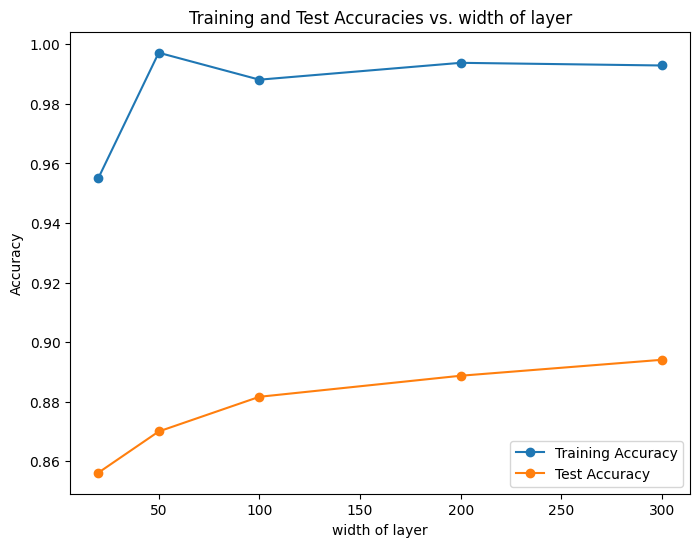

In [26]:
from sklearn.metrics import accuracy_score
from sklearn.neural_network import MLPClassifier
import time

#creating empty lists to store accuracy value for each widths
a_test = []
a_train = []

widths = (20, 50, 100, 200, 300)
for width in widths:
    # Create and train the MLP model
    rec=time.time()
    mlp = MLPClassifier(hidden_layer_sizes=(width,), alpha=0.001, random_state=42)
    mlp.fit(X_train_scaled, y_train)
    print("---"*80)
    print(f"Hidden layer size is  : {width}")
    print(f"- Time taken to train the model is :"+ str(time.time()-rec) + "seconds -")
    # Predict on training and test sets
    y_train_pred = mlp.predict(X_train_scaled)
    y_test_pred = mlp.predict(X_test_scaled)

    # Calculate and store training and test accuracies
    train_accuracy = accuracy_score(y_train, y_train_pred)
    print(f'The accuracy score of train data is :',train_accuracy)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    print(f'The accuracy score of test data is :',test_accuracy)
    a_train.append(train_accuracy)
    a_test.append(test_accuracy)

# Plot the results
plt.figure(figsize=(8, 6))
plt.plot(widths, a_train, label='Training Accuracy',marker='o')
plt.plot(widths, a_test, label='Test Accuracy',marker='o')
plt.title('Training and Test Accuracies vs. width of layer')
plt.xlabel('width of layer')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

Questions:

1. When you trained for all the different widths, did you notice anything about how long each training took? Discuss this.

For different widths the time taken for each training is different ,for width 20,50,100 and 300 it is increasing when the the width is increasing .It is taking 177.15,219.50,235.92 and 264.41 seconds for width of 20,50,100 and 300 simultaneously.But for 200 it is taking less time (203.66 seconds) than 100 and 50 neurons.Neglecting it  we can say that generally when width of the layer  is increasing the time taken to train also increases.Eventhough the time taken for training the model is increased when increasing the width of the layer,the accuracy of the model is also increasing ( it increased from 85.6% to 89.4%)

2. What can you infer from the graph?
For the second question, think about the following:
* For the number of neurons you have tested, what is the best? (Highest performance -vs- lowest number of neurons)
* How many weights are learned by the algorithm for our optimal solution?
* Is there any evidence of overfitting occuring? Discuss this. What could we do to reduce this, if it is evident? (No need to implement anything to address tyhe overfitting, just comment)
(Hint: a large divergence between training accuracy and testing accuracy can indicate over-fitting).

From the graph we can infer that when number of width of layer is 50, 200 and 300 training data accuracy is nearer to 100%, but the test data accuracy for 300  is better than the other two.

when the width of the layer is increased the test accuracy is also increasing.so the highest performing as per the graph is with the highest width, i.e 300.

Accuracy for each layer size is

width 20--85.61%

width 50--87%

width 100-88.16%

width 200-88.87%

width 300-89.40%

Highest accuracy ( Highest performance )is seen when width is at 300.

weights learned by the algorithm at width 300(optimal solution) is 238510

(weights learned by first layer is 785 * 300=235500

weights learned by second layer is 301 * 10=3010 )

Also the weight learned at different width is

width 20--15910

width 50--39760

width 100-79600

width 200-159010

As seen in the graph there is considerable difference in the training accuracy and testing accuracy which indicates over-fitting.we can see overfitting in all width size of layers.At 20 we can see the difference of train and test accuracy is  aroung 10 and from 20-50 it is increasing. When the width of the layer is at 50 the overfitting is maximum and then afterwards it is reducing and minimum at when the width is at 300.

## Task 3: The deeper the better!

Previously, we only had a single hidden layer, and we went as wide as a couple of hundred neurons. That is a lot of neurons and a lot of computation. Can we do better with fewer neurons by going deeper and using more layers? Now we're going to start playing with different configurations.

Rerun the above loop, but let's use a set of deeper networks. These are going to be simply designed. I suggest to use something like:
`layers = ((20,20),(20,20,20),(50,20),(100,100,50))`

Plot the train and test accuracy as a graph.

Same as before, set `alpha=0.001` and set `random_state` to some constant (e.g. `random_state=42`)

**Note**: you might be feeling at this point that picking the neural network architecture is kind of random. At the moment, it is, to be honest. How many neurons per layer should I use? How many layers? And then I have to pick the training parameters on top of this?? These are all called hyperparameters of the network, and there is a lot of skill to develop to develop to be able to design networks efficiently and pick the right training parameters.

<font color='red'>Enter your code here</font>

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Hidden layer size : (20, 20)
Time taken for training is :153.55121541023254seconds 
The accuracy score of train data  is : 0.9656071428571429
The accuracy score of test data is : 0.8607857142857143
------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Hidden layer size : (20, 20, 20)
Time taken for training is :169.8469045162201seconds 
The accuracy score of train data  is : 0.9611607142857143
The accuracy score of test data is : 0.8560714285714286
-----------------------------------------------------------------------------------------------------------------------

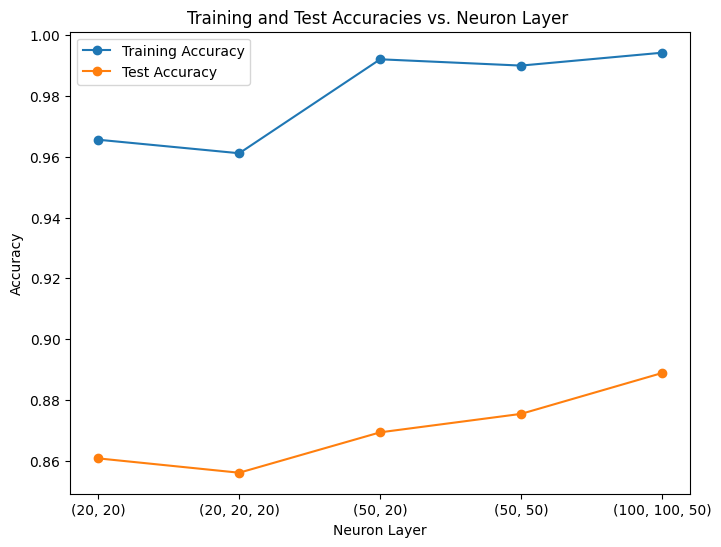

In [32]:
########################
# Your classifier training code here

layers = ((20,20),(20,20,20),(50,20),(50,50),(100,100,50))

#creating empty lists to store accuracy value for each layers
a_test = []
a_train = []
#creating a dictionary to store predicted test data inorder to plot confusion matrix for task 4
predictions_by_layer = {}
for layer in layers:
    # Create and train the MLP model
    rec=time.time()
    mlp = MLPClassifier(hidden_layer_sizes=(layer), alpha=0.001, random_state=42)
    mlp.fit(X_train_scaled, y_train)
    print("---"*80)
    print(f"Hidden layer size : {layer}")
    print(f"Time taken for training is :"+ str(time.time()-rec) + "seconds ")
    # Predict on training and test sets
    y_train_pred = mlp.predict(X_train_scaled)
    y_test_pred = mlp.predict(X_test_scaled)
    # Store predictions for the current layer
    predictions_by_layer[layer] = y_test_pred
    # Calculate and store training and test accuracies
    train_accuracy = accuracy_score(y_train, y_train_pred)
    print(f'The accuracy score of train data  is :',train_accuracy)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    print(f'The accuracy score of test data is :',test_accuracy)
    a_train.append(train_accuracy)
    a_test.append(test_accuracy)

# Plot the results
plt.figure(figsize=(8, 6))
plt.plot([str(layer) for layer in layers], a_train, label='Training Accuracy',marker='o')
plt.plot([str(layer) for layer in layers], a_test, label='Test Accuracy',marker='o')
plt.title('Training and Test Accuracies vs. Neuron Layer ')
plt.xlabel('Neuron Layer')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

#### Questions

What can you infer from the graph? (answer in the text box here).

Think about the following:
* Do I have a deeper network that has fewer neurons but is doing better than my very wide network?
* How many weights did I need to train?

<font color='red'>Enter your text here</font>

From task 2, accuracy was as follows

width 20--85.61%

width 50--87%

width 100-88.16%

width 200-88.87%

width 300-89.40%

and in this task

20,20 ------86.07%

20,20,20----85.67%

50,20-------86.93%

50,50---87.54%

100,100,50--88.88%

with  a single layer with 20 neurons we got 85.61% ,with 2 hidden layer of 20 each we are getting accuracy of  86.07%     and with 3 layers of 20 each we are getting accuracy of 85.60%.in this case highest is with 2 hidden layers of 20 each.Similarly for a single hidden layer of 50 neurons we are getting accuracy of 87% and with 2 layers of 50 each we are getting accuracy of 87.54% ,a slight increase in accuracy when we use 2 hidden layers of 50 each. And even with one hidden layer of 50 and another with 20 combined we are getting accuracy of 86.93% which is more than 20 neurons of different scenarios we tried but less than even 50 neurons in one hidden layers accuracy. with a single layer of 100 we are getting 88.16% but with 100,100,50 not that much increase in accuracy.so we cannot generalise anything from this data. we can try by comparing weights learned by algorithm and accuracy

weights learned by the algorithm at task 2 with a single hidden layers  and accuracies are

20--15910--88.87%

50--39760--87%

100-79600--88.16%

200-159010--88.87%


300--238510--89.40%

weights need to train at different configuration in this tasks is

20,20 ------16330--86.07%

(weights learned by first layer is 785 * 20=15700

weights learned by second layer is 21 * 20=420
weights learned by third layer is 21 * 10=210 )

20,20,20----16750--85.60%

50,20-------39460--86.93%

50,50-----42820--87.54%

100,100,50--94160--88.88%

here, with weights learned by algorithm with a single hidden layer of 20 which is 15910 is giving an accuracy of 88.87% and with 2 hidden layer of 20 each with weights learned of 16330 which is higher than the above is giving less accuracy (86.07%).Similarly if we look higher number of weights learned like 159010 with a single hidden ayer of 200 neurons is achieving same accuracy with very few weights leaned ,94160,with 3 hidden layers of 100,100,and 50 neurons.

So there is not a single answer for which one is better.As a conclusion we can say that the choice between a deeper network  or a very wide network depends on so many parameters like complexity of the problem, available data, computational resources etc.

## Task 4: Confusion matrix

A [confusion matrix](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.plot_confusion_matrix.html#sklearn.metrics.plot_confusion_matrix) is a powerful way to visualise errors in your trained network. Plot a confusion matrix for your best model above (of course, plot using the test data).

Describe what you see in the confusion matrix.



Best model from Task 3 was with hidden layers of (100,100,50) which yields an accuracy of 88.88% (and in task 2 when width was 300 which was not given in question eventhough i plot the confusion matrix of same)

Plotting  confusion matrix -Task 3 with hidden layers of (100,100,50) which yields an accuracy of 88.88%

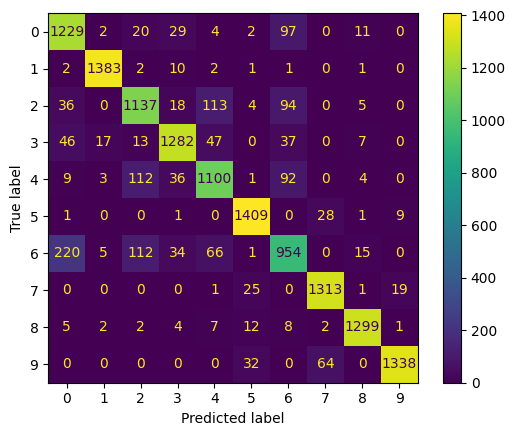

In [33]:
########################
#plotting confusion matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics._plot.confusion_matrix import ConfusionMatrixDisplay
results=confusion_matrix(y_test, predictions_by_layer[(100,100,50)])
disp=ConfusionMatrixDisplay(confusion_matrix=results,display_labels=mlp.classes_)
disp.plot()

In confusion matrix we know that correct predicted classes numbers are shown in diagonal. In the above one, the numbers in the yellow( True class labels-1,5,9,8,7) along the diagonal shows that the accuracy of prediction of these classes was more while comparing the other one in different colours of diagonal.the class label 0 (light green in the confusion matrix) was predicted correctly after the yellow ones,and the class label 6 was missclassified most.

Plotting  confusion matrix -Task 2 with hidden layer width of 300 which yields an accuracy of 89.40%

The accuracy score of train data is : 0.9929107142857143
The accuracy score of test data is : 0.8940714285714285


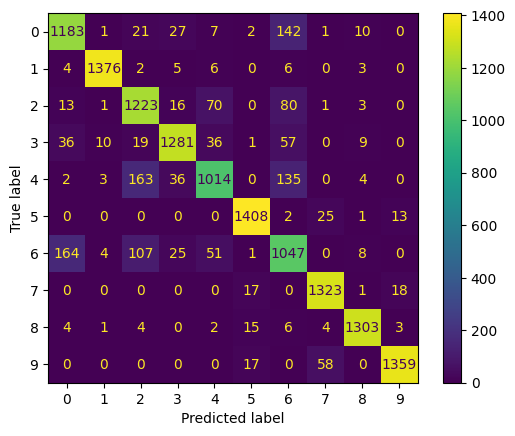

In [34]:
mlp = MLPClassifier(hidden_layer_sizes=300, alpha=0.001, random_state=42)
mlp.fit(X_train_scaled, y_train)
# Predict on training and test sets
y_train_pred = mlp.predict(X_train_scaled)
y_test_pred = mlp.predict(X_test_scaled)

# Calculate training and test accuracies
train_accuracy = accuracy_score(y_train, y_train_pred)
print(f'The accuracy score of train data is :',train_accuracy)
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f'The accuracy score of test data is :',test_accuracy)
results=confusion_matrix(y_test,y_test_pred)
disp=ConfusionMatrixDisplay(confusion_matrix=results,display_labels=mlp.classes_)
disp.plot()

In confusion matrix we know that correct predicted classes numbers are shown in diagonal. In the above one, the numbers in the yellow( True class labels-1,5,7,8,9) along the diagonal shows that the accuracy of prediction of these classes was more while comparing the other one in different colours of diagonal.the class label 1,2 and 3 (light green in the confusion matrix) was predicted correctly after the yellow ones,and the class label 4 and 6 was missclassified most.

we can see that in both cases true label 4 and 6 was missclassified more than other classes and 1 and 5 was correctly classified than others